# Feature Engineering 1: From variables to features

### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [11]:
# Establish postgres access details
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# Start the engine and connect to the database
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# Perform a select query
performance_df = pd.read_sql_query('SELECT * FROM studentsperformance', con=engine)

# Dispose the engine. We don't need it anymore
engine.dispose()

In [24]:
performance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72,74
1,female,group C,some college,standard,completed,69.0,90,88
2,female,group B,master's degree,standard,none,90.0,95,93
3,male,group A,associate's degree,free/reduced,none,47.0,57,44
4,male,group C,some college,standard,none,76.0,78,75


Text(0.5, 0, 'writing score')

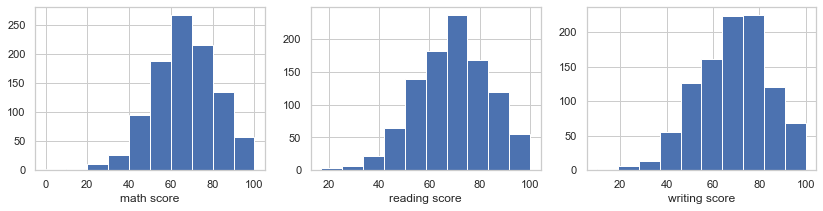

In [12]:
plt.figure(figsize=(14,3))

plt.subplot(131)
plt.hist(performance_df['math score'])
plt.xlabel('math score')

plt.subplot(132)
plt.hist(performance_df['reading score'])
plt.xlabel('reading score')

plt.subplot(133)
plt.hist(performance_df['writing score'])
plt.xlabel('writing score')

In [13]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(performance_df['math score'])
norm_stats = normaltest(performance_df['math score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(performance_df['reading score'])
norm_stats = normaltest(performance_df['reading score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(performance_df['writing score'])
norm_stats = normaltest(performance_df['writing score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


None of them are normally distributed

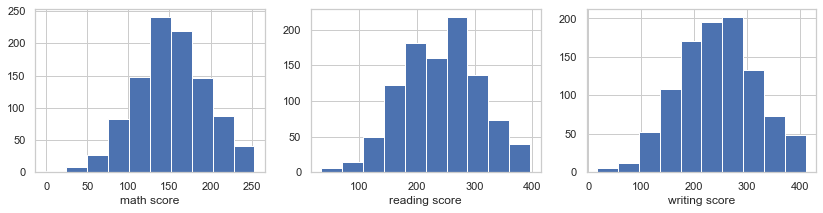

In [20]:
from scipy.stats import boxcox

subjects = ['math score', 'reading score', 'writing score']
for sub in subjects:
    performance_df[sub] = performance_df[sub].where(performance_df[sub] > 0, .001)

math_boxcox,_ = boxcox(performance_df['math score'])
reading_boxcox,_ = boxcox(performance_df['reading score'])
writing_boxcox,_ = boxcox(performance_df['writing score'])

plt.figure(figsize=(14,3))

plt.subplot(131)
plt.hist(math_boxcox)
plt.xlabel('math score')

plt.subplot(132)
plt.hist(reading_boxcox)
plt.xlabel('reading score')

plt.subplot(133)
plt.hist(writing_boxcox)
plt.xlabel('writing score')

plt.show()

In [22]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.1162351840139568 and p value is 0.5722853250197986
Normality test statistics is 1.0359861016380876 and p value is 0.5957149186167052
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.28227460696581 and p value is 0.07128015626992969
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


Now they are all JUST on the acceptable side of normality

### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.


In [25]:
performance_df = performance_df.assign(exam_score=lambda x: (x['math score'] + x['reading score'] + x['writing score']) / 3)

In [26]:
performance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,exam_score
0,female,group B,bachelor's degree,standard,none,72.0,72,74,72.666667
1,female,group C,some college,standard,completed,69.0,90,88,82.333333
2,female,group B,master's degree,standard,none,90.0,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,49.333333
4,male,group C,some college,standard,none,76.0,78,75,76.333333


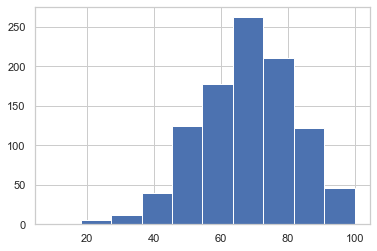

Jarque-Bera test statistics is 15.453231723268715 and p value is 0.00044093377598231065
Normality test statistics is 15.186572051817919 and p value is 0.0005038227562212466


In [28]:
plt.hist(performance_df['exam_score'])
plt.show()

jb_stats = jarque_bera(performance_df['exam_score'])
norm_stats = normaltest(performance_df['exam_score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

print('\nIt is non-normal. Applying boxcox')

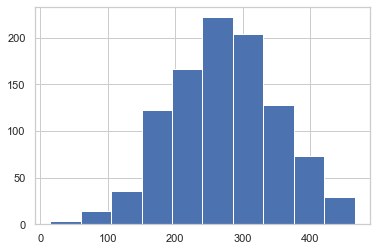

Jarque-Bera test statistics is 2.4354158145116975 and p value is 0.29590763796410113
Normality test statistics is 2.7798809633623836 and p value is 0.2490901296162312

It is non-normal. Applying boxcox


In [31]:
exam_boxcox,_ = boxcox(performance_df['exam_score'])

plt.hist(exam_boxcox)
plt.show()

jb_stats = jarque_bera(exam_boxcox)
norm_stats = normaltest(exam_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

print('\nNow THAT is normal')

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

All other variables seem like they'd contribute. Specifically, I'd say focusing on gender, test_preparation, and lunch as useful variables. For proofs, refer to previous assignment

# Done Boi